In [1]:
import uproot
import os
import pandas as pd


In [4]:

# Specify the path to the ROOT file
file_path = "../data/root_files/fermion_tmp/eta_fermion_ma_0.1_dt_0.6.root"

# Open the ROOT file
root_file = uproot.open(file_path)

# Access the contents of the ROOT file
tree = root_file["pot_tree"]

# Read the data from the ROOT file
data = tree.arrays()

# Print the data
print(data["ntrials"])


[8.01e+07]


In [10]:
def get_name_info (file_name):
    # Split the file name
    split_file_name = file_name.split("_")

    origin_type = split_file_name[0]
    dm_type = split_file_name[1]
    mass = split_file_name[3]
    dt_ratio = split_file_name[5].strip(".root")
    return origin_type, dm_type, mass, dt_ratio
     

In [31]:
#list the files in the directory
ratios = []
path = "../data/root_files/fermion_tmp/"
file_list = os.listdir(path)
for file in file_list:
    root_file = uproot.open(path+file)
    #if root file empty continue
    if len(root_file) == 0:
        continue
    
    ntrials = root_file["pot_tree"].arrays()["ntrials"]
    
    event_number = root_file["event_tree"].arrays()["event_number"][-1]
    origin_type, dm_type, mass, dt_ratio = get_name_info(file)
    ratio = ntrials/event_number
    sigma = ntrials**0.5/event_number
    ratios.append([origin_type, dm_type, mass, dt_ratio, ratio,sigma])
#make ratios into a dataframe
ratios = pd.DataFrame(ratios, columns = ["meson_type", "dm_type", "mass", "dt_ratio", "ratio", "sigma"])
ratios["ratio"] = ratios["ratio"].apply(lambda x: float(x[0]))

ratios["mass"] = ratios["mass"].apply(lambda x: float(x))
ratios['sigma'] = ratios['sigma'].apply(lambda x: float(x[0]))
ratios.to_csv("../data/csv/generated_vs_detector_hit_dm_ratios_fermion.csv", index = False)
    

In [63]:
ratios = []
path = "../data/root_files/scalar_tmp/"
file_list = os.listdir(path)
for file in file_list:
    root_file = uproot.open(path+file)
    #if root file empty continue
    if len(root_file) == 0:
        continue
    
    ntrials = root_file["pot_tree"].arrays()["ntrials"]
    
    event_number = root_file["event_tree"].arrays()["event_number"][-1]
    
    origin_type, dm_type, mass, dt_ratio = get_name_info(file)
    ratio = ntrials/event_number
    ratios.append([origin_type, dm_type, mass, dt_ratio, ratio])
#make ratios into a dataframe
ratios = pd.DataFrame(ratios, columns = ["meson_type", "dm_type", "mass", "dt_ratio", "ratio"])
ratios["ratio"] = ratios["ratio"].apply(lambda x: x[0])
ratios["mass"] = ratios["mass"].apply(lambda x: float(x))

ratios.to_csv("../data/csv/generated_vs_detector_hit_dm_ratios_scalar.csv", index = False)

In [32]:
ratios

,meson_type,dm_type,mass,dt_ratio,ratio,sigma
0,eta,fermion,0.09,0.6,8174.183418,0.904157
1,pi0,fermion,0.08,0.6,9203.860486,0.959415
2,pi0,fermion,0.07,0.33,9350.773777,0.967042
3,eta,fermion,0.07,2.0,7820.907491,0.884403
4,pi0,fermion,0.05,0.33,9409.306731,0.970064
5,pi0,fermion,0.06,0.33,9243.480648,0.961478
6,eta,fermion,0.20,0.6,7894.422442,0.888550
7,eta,fermion,0.07,0.6,8282.852285,0.910147
8,eta,fermion,0.02,2.0,7968.505751,0.892710
9,eta,fermion,0.06,2.0,7691.628563,0.877063


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


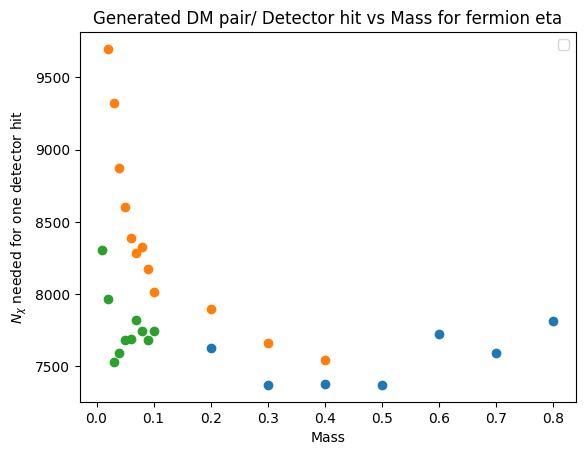

In [33]:
import matplotlib.pyplot as plt
ratios = pd.read_csv("../data/csv/generated_vs_detector_hit_dm_ratios_fermion.csv")
eta_ratios = ratios.loc[ratios['meson_type'] == 'eta']
# Group the ratios by dt_ratio
grouped_ratios = eta_ratios.groupby('dt_ratio')

# Plot the ratios for each dt_ratio with a different color
for dt_ratio, group in grouped_ratios:
    plt.errorbar(group['mass'], group['ratio'],fmt = 'o', yerr = group['sigma'])
# Set the labels and title of the plot
plt.xlabel('Mass')
plt.ylabel(r'$N_{\chi}$ needed for one detector hit')
plt.title('Generated DM pair/ Detector hit vs Mass for fermion eta')

# Add a legend to the plot
plt.legend()

# Show the plot

plt.savefig("../plots/ratio_fermion_eta_with_error.png")


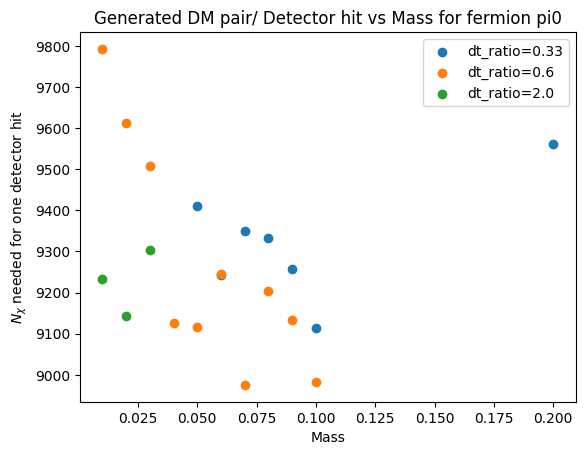

In [6]:
import matplotlib.pyplot as plt
ratios = pd.read_csv("../data/csv/generated_vs_detector_hit_dm_ratios_fermion.csv")
eta_ratios = ratios.loc[ratios['meson_type'] == 'pi0']
# Group the ratios by dt_ratio
grouped_ratios = eta_ratios.groupby('dt_ratio')

# Plot the ratios for each dt_ratio with a different color
for dt_ratio, group in grouped_ratios:
    plt.scatter(group['mass'], group['ratio'], label=f'dt_ratio={dt_ratio}')

# Set the labels and title of the plot
plt.xlabel('Mass')
plt.ylabel(r'$N_{\chi}$ needed for one detector hit')
plt.title('Generated DM pair/ Detector hit vs Mass for fermion pi0')

# Add a legend to the plot
plt.legend()

# Show the plot

plt.savefig("../plots/ratio_fermion_pi0.png")

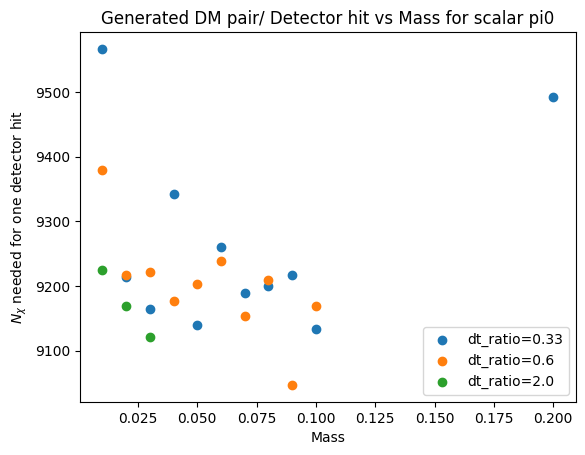

In [7]:
ratios = pd.read_csv("../data/csv/generated_vs_detector_hit_dm_ratios_scalar.csv")
eta_ratios = ratios.loc[ratios['meson_type'] == 'pi0']
# Group the ratios by dt_ratio
grouped_ratios = eta_ratios.groupby('dt_ratio')

# Plot the ratios for each dt_ratio with a different color
for dt_ratio, group in grouped_ratios:
    plt.scatter(group['mass'], group['ratio'], label=f'dt_ratio={dt_ratio}')

# Set the labels and title of the plot
plt.xlabel('Mass')
plt.ylabel(r'$N_{\chi}$ needed for one detector hit')
plt.title('Generated DM pair/ Detector hit vs Mass for scalar pi0')

# Add a legend to the plot
plt.legend()

# Show the plot

plt.savefig("../plots/ratio_scalar_pi0.png")

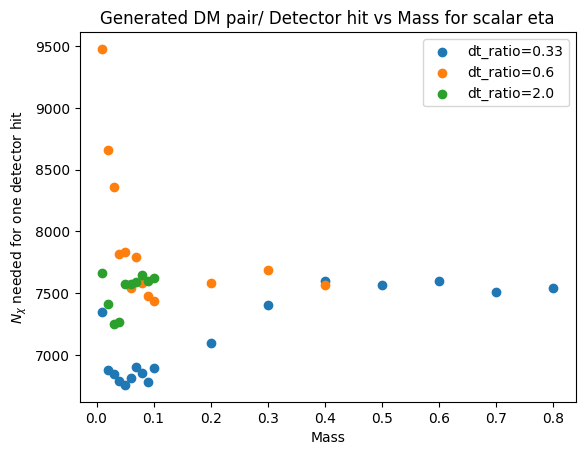

In [8]:
ratios = pd.read_csv("../data/csv/generated_vs_detector_hit_dm_ratios_scalar.csv")
eta_ratios = ratios.loc[ratios['meson_type'] == 'eta']
# Group the ratios by dt_ratio
grouped_ratios = eta_ratios.groupby('dt_ratio')

# Plot the ratios for each dt_ratio with a different color
for dt_ratio, group in grouped_ratios:
    plt.scatter(group['mass'], group['ratio'], label=f'dt_ratio={dt_ratio}')

# Set the labels and title of the plot
plt.xlabel('Mass')
plt.ylabel(r'$N_{\chi}$ needed for one detector hit')
plt.title('Generated DM pair/ Detector hit vs Mass for scalar eta')

# Add a legend to the plot
plt.legend()

# Show the plot

plt.savefig("../plots/ratio_scalar_eta.png")